In [1]:
from bs4 import BeautifulSoup
import requests


In [3]:
url = "https://en.wikipedia.org/wiki/List_of_video_games_considered_the_best"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html")


In [107]:
table = soup.find_all("table")[1]

In [29]:
game_titles = table.find_all(scope = "col")
print (table_titles)

[<th scope="col">Year
</th>, <th scope="col">Game
</th>, <th scope="col"><a href="/wiki/Video_game_genre" title="Video game genre">Genre</a>
</th>, <th scope="col">Publisher
</th>, <th scope="col">Original platform(s)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>a<span class="cite-bracket">]</span></a></sup>
</th>, <th class="unsortable" scope="col"><abbr title="Reference(s)">Ref.</abbr>
</th>]


In [31]:
table_titles = [title.text.strip() for title in game_titles]
print (table_titles)

['Year', 'Game', 'Genre', 'Publisher', 'Original platform(s)[a]', 'Ref.']


In [33]:
cleaned_titles = [col.replace('[a]', '') for col in table_titles]
print(cleaned_titles)

['Year', 'Game', 'Genre', 'Publisher', 'Original platform(s)', 'Ref.']


In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(columns = cleaned_titles)

df

,Year,Game,Genre,Publisher,Original platform(s),Ref.


In [108]:
table_rows = table.find_all("tr")[1:]


In [98]:
for row in table_rows:
    year_tag = row.find("th")
    if year_tag:
        year = year_tag.text.strip()
    
    
    row_data = row.find_all("td")
    individual_row_data = [data.text.strip() for data in row_data]
    
    
    if individual_row_data:  
        individual_row_data.insert(0, year)
    
    
    
    length = len(df)
    df.loc[length] = individual_row_data

In [99]:
df

,Year,Game,Genre,Publisher,Original platform(s),Ref.
0,1971,The Oregon Trail,Strategy,MECC,HP 2100,[A]
1,1972,Pong,Sports,"Atari, Inc.",Arcade,[B]
2,1977,Combat,Top-down shooter,"Atari, Inc.",Atari 2600,[C]
3,1977,Zork,Adventure,Infocom,PDP-10,[D]
4,1978,Space Invaders,Shoot 'em up,Taito,Arcade,[E]
...,...,...,...,...,...,...
327,2018,Red Dead Redemption 2,Action-adventure,Rockstar Games,"PS4, Xbox One",[LP]
328,2018,Super Smash Bros. Ultimate,Fighting,Nintendo,Nintendo Switch,[LQ]
329,2019,Disco Elysium,Role-playing,ZA/UM,PC,[LR]
330,2020,Hades,Roguelike,Supergiant Games,"PC, Mac, Nintendo Switch",[LS]


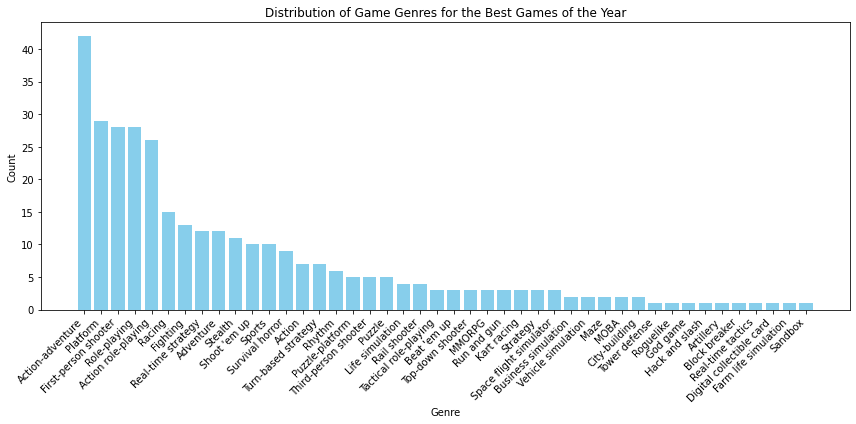

In [106]:
import pandas as pd
import matplotlib.pyplot as plt


genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Game Genres for the Best Games of the Year')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()